In [1]:
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

from matplotlib.pyplot import rc_context
from matplotlib.pyplot import rcParams
from matplotlib import colors
from matplotlib.colors import ListedColormap

import gseapy as gp
from gseapy.plot import barplot, dotplot, gseaplot, heatmap

import besca as bc
import pytest

# sc.set_figure_params(figsize=(5,5))

sc.logging.print_header()

INFO:torch.distributed.nn.jit.instantiator:Created a temporary directory at /tmp/tmp2z262hgs
INFO:torch.distributed.nn.jit.instantiator:Writing /tmp/tmp2z262hgs/_remote_module_non_scriptable.py
/home/laura.vicente/miniconda3/envs/ipykernel_py3/lib/python3.11/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/home/laura.vicente/miniconda3/envs/ipykernel_py3/lib/python3.11/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (
/home/laura.vicente/miniconda3/envs/ipykernel_py3/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning:

The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value f

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==1.5.2 scikit-learn==1.2.2 statsmodels==0.14.0 python-igraph==0.10.4 pynndescent==0.5.10


In [2]:
#Define a nice colour map for gene expression
grey = plt.cm.Greys_r(np.linspace(0.7,0.8,20))
reds = plt.cm.Reds(np.linspace(0, 1, 128))
colorsComb_reds = np.vstack([grey, reds])
mymap_reds = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb_reds)

oranges = plt.cm.Oranges(np.linspace(0, 1, 128))
colorsComb_oranges = np.vstack([grey, oranges])
mymap_oranges = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb_oranges)

blues = plt.cm.Blues(np.linspace(0, 1, 128))
colorsComb_blues = np.vstack([grey, blues])
mymap_blues = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb_blues)


In [3]:
adata = sc.read('./data/3GEX_processed_cnv.h5ad')

In [4]:
adata

AnnData object with n_obs × n_vars = 62254 × 21357
    obs: 'site', 'sample', 'sample_type', 'time', 'treatment', 'sample_t', 'sample_r', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'n_genes', 'leiden', 'doublet_score', 'predicted_doublet', 'S_score', 'G2M_score', 'phase', 'type', 'tumor 7d', 'cnv_leiden', 'cnv_score'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'mean', 'std', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'Unnamed: 0', 'chromosome', 'start', 'end'
    uns: 'cnv', 'cnv_leiden_colors', 'cnv_neighbors', 'dendrogram_cnv_leiden', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', '

In [5]:
adata.obs['sample'].value_counts()

B7    5554
A8    5156
B2    5154
B4    4727
B8    4499
B1    4451
A7    4207
A5    3886
B6    3774
B3    3365
C2    3333
S2    3198
B5    2728
S4    2289
S3    1782
A6    1314
A4    1109
C3     960
A3     648
A2     118
A1       2
Name: sample, dtype: int64

In [7]:
adata.obs['sample_r'].value_counts()

EarlyP-2    5554
LateT-3     5156
EarlyT-1    5154
EarlyC-2    4727
EarlyP-3    4499
EarlyC-1    4451
LateC-3     4207
LateC-2     3886
EarlyT-3    3774
EarlyP-1    3365
GL261-1     3333
GSC-1       3198
EarlyT-2    2728
GSC-3       2289
GSC-2       1782
LateP-2     1314
LateT-2     1109
GL261-2      960
LateT-1      648
LateC-1      118
LateP-1        2
Name: sample_r, dtype: int64

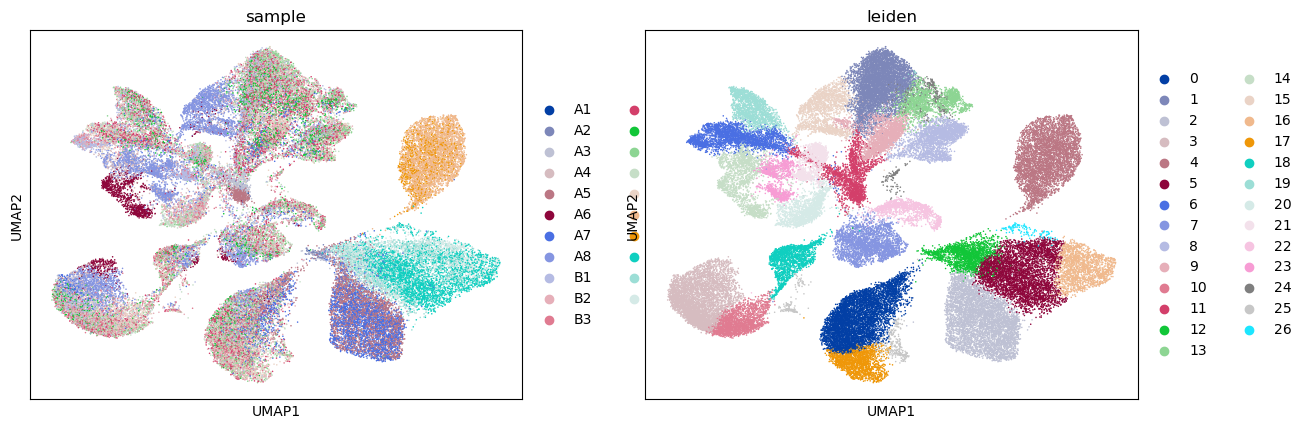

In [5]:
sc.pl.umap(adata, color=['sample','leiden'], size=5)

In [11]:
adata.obs['sample_type'] = 'Brain'
adata.obs.loc[adata.obs['sample'].isin(['C2','C3']), 'sample_type'] = 'GL261'
adata.obs.loc[adata.obs['sample'].isin(['S2','S3','S4']), 'sample_type'] = 'GL261-GSCs'


... storing 'sample_type' as categorical
/home/laura.vicente/miniconda3/envs/ipykernel_py3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:163: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

/home/laura.vicente/miniconda3/envs/ipykernel_py3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



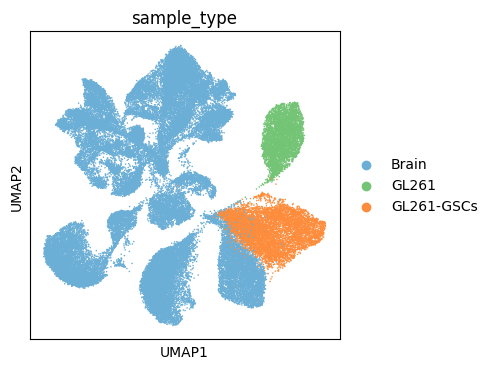

In [12]:
tab20c = sns.color_palette("tab20c").as_hex()
sample_type = [tab20c[1], tab20c[9], tab20c[5]]

with rc_context({'font.size': 10.0,'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color='sample_type',palette=sample_type, size=5)

/home/laura.vicente/miniconda3/envs/ipykernel_py3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:163: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

/home/laura.vicente/miniconda3/envs/ipykernel_py3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



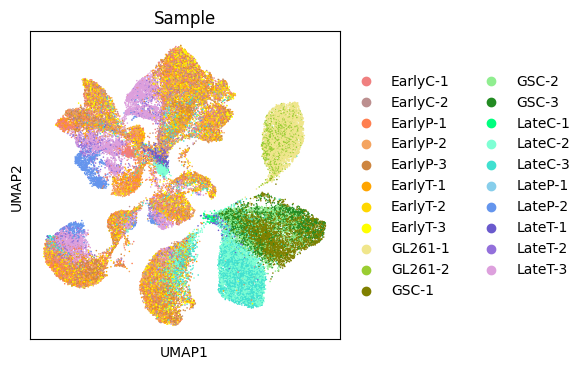

In [23]:
palette= ['lightcoral','rosybrown','coral','sandybrown','peru','orange','gold','yellow',
        'khaki','yellowgreen','olive','lightgreen','forestgreen','springgreen',
        'aquamarine','turquoise','skyblue','cornflowerblue','slateblue','mediumpurple',
        'plum','violet','pink']

with rc_context({'font.size': 10.0,'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color='sample_r', palette=palette ,size=5, title='Sample')

/home/laura.vicente/miniconda3/envs/ipykernel_py3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:163: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

/home/laura.vicente/miniconda3/envs/ipykernel_py3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



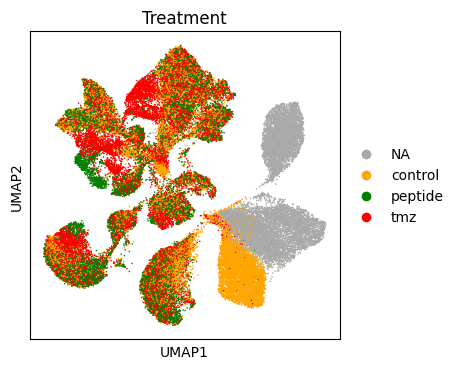

In [20]:
treatment= ['darkgrey','orange','green','red']

with rc_context({'font.size': 10.0,'figure.figsize': (4, 4),
                }):
    sc.pl.umap(adata, color='treatment',palette=treatment, title='Treatment', size=5, frameon=True)

/home/laura.vicente/miniconda3/envs/ipykernel_py3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:163: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

/home/laura.vicente/miniconda3/envs/ipykernel_py3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



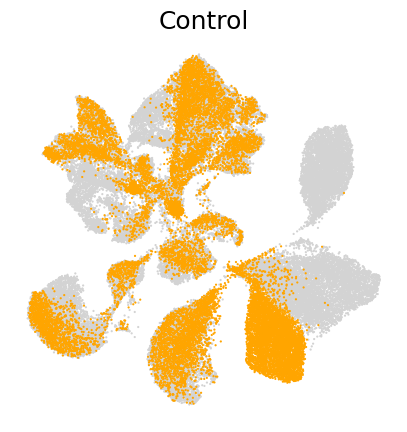

/home/laura.vicente/miniconda3/envs/ipykernel_py3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:163: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

/home/laura.vicente/miniconda3/envs/ipykernel_py3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



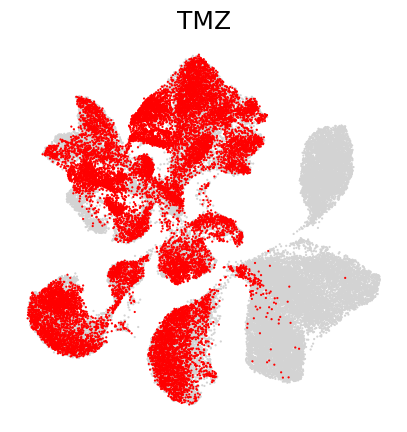

/home/laura.vicente/miniconda3/envs/ipykernel_py3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:163: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

/home/laura.vicente/miniconda3/envs/ipykernel_py3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



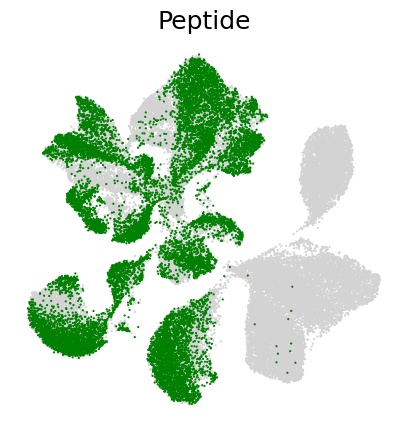

In [18]:
with rc_context({'font.size': 15.0, 'figure.figsize': (5, 5)}):
    sc.pl.umap(adata, color='treatment', groups='control', size=10,  
                   title='Control', legend_loc=None, palette=['orange'], frameon=False)
        
    sc.pl.umap(adata, color='treatment', groups='tmz', size=10,  
                   title='TMZ', legend_loc=None, palette=['red'], frameon=False)
    
    sc.pl.umap(adata, color='treatment', groups='peptide', size=10,  
                   title='Peptide', legend_loc=None, palette=['green'], frameon=False)


/home/laura.vicente/miniconda3/envs/ipykernel_py3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:163: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

/home/laura.vicente/miniconda3/envs/ipykernel_py3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



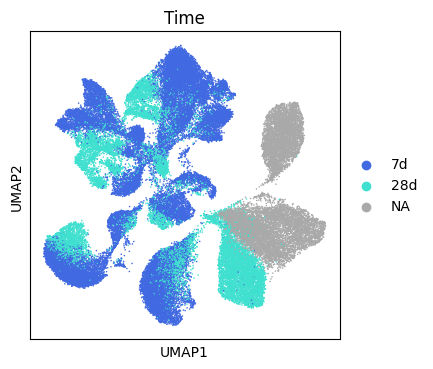

In [22]:
with rc_context({'font.size': 10.0,'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color='time',palette=['royalblue','turquoise','darkgrey'], size=5, title='Time')

In [56]:
# with rc_context({'font.size': 15.0, 'figure.figsize': (5, 5)}):
#     sc.pl.umap(adata, color='time', groups='7d', size=10,  
#                    title='Early', legend_loc=None, palette=['gold'], frameon=False)
        
#     sc.pl.umap(adata, color='time', groups='28d', size=10,  
#                    title='Late', legend_loc=None, palette=['darkorange'], frameon=False)
    
#     sc.pl.umap(adata, color='time', groups='NA', size=10,  
#                    title='Culture', legend_loc=None, palette=['violet'], frameon=False)

In [24]:
# sc.tl.rank_genes_groups(adata, groupby='sample_type', key_added='rank_genes_sample_type')

In [25]:
# sc.pl.rank_genes_groups(adata, groupby='sample_type', key='rank_genes_sample_type')

In [26]:
adata.write('./data/3GEX_processed_cnv.h5ad')

---

/home/laura.vicente/miniconda3/envs/ipykernel_py3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:163: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

/home/laura.vicente/miniconda3/envs/ipykernel_py3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



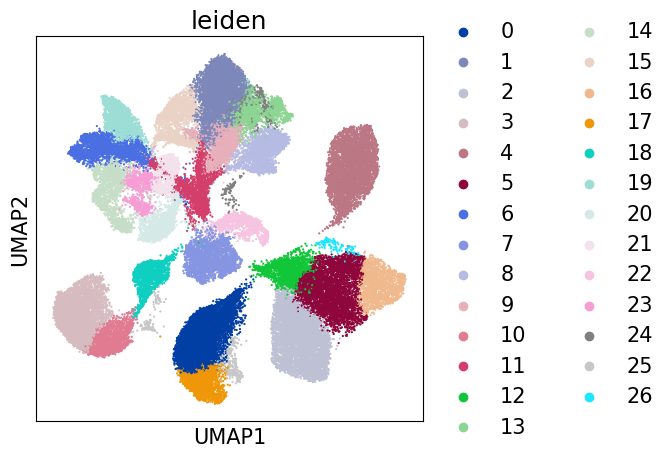

In [27]:
with rc_context({'font.size': 15.0, 'figure.figsize': (5, 5)}):
    sc.pl.umap(adata, color=['leiden'], size=10)

In [28]:
set(adata.obs['sample_type'])

{'Brain', 'GL261', 'GL261-GSCs'}

... storing 'annotations' as categorical
/home/laura.vicente/miniconda3/envs/ipykernel_py3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:163: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

/home/laura.vicente/miniconda3/envs/ipykernel_py3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



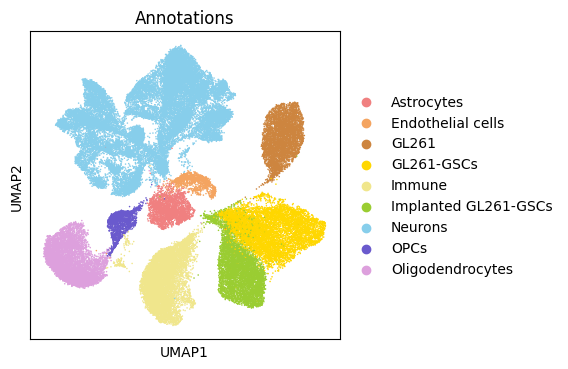

In [35]:
adata.obs['annotations'] = 'Neurons'
adata.obs.loc[adata.obs['leiden'].isin(['4','12','26','5','2','16']), 'annotations'] = 'Implanted GL261-GSCs'
adata.obs.loc[adata.obs['sample_type'].isin(['GL261']), 'annotations'] = 'GL261'
adata.obs.loc[adata.obs['sample_type'].isin(['GL261-GSCs']), 'annotations'] = 'GL261-GSCs'

adata.obs.loc[adata.obs['leiden'].isin(['7']), 'annotations'] = 'Astrocytes'
adata.obs.loc[adata.obs['leiden'].isin(['22']), 'annotations'] = 'Endothelial cells'
adata.obs.loc[adata.obs['leiden'].isin(['0','17','25']), 'annotations'] = 'Immune'
adata.obs.loc[adata.obs['leiden'].isin(['18']), 'annotations'] = 'OPCs'
adata.obs.loc[adata.obs['leiden'].isin(['3','10']), 'annotations'] = 'Oligodendrocytes'



annot= ['lightcoral','sandybrown','peru','gold',
        'khaki','yellowgreen',
        'skyblue','slateblue',
        'plum','pink','violet']


with rc_context({'font.size': 10.0,'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color =['annotations'], palette=annot, size=5, title='Annotations')

In [36]:
adata.write('./data/3GEX_annotated.h5ad')

---

In [37]:
pwd

'/home/laura.vicente/bruno/projects/genomics/laura.garcia/glioblastoma/analysis/mcherry_alignment/multiome'

In [5]:
adata = sc.read('./data/3GEX_annotated.h5ad')

In [38]:
adata

AnnData object with n_obs × n_vars = 62254 × 21357
    obs: 'site', 'sample', 'sample_type', 'time', 'treatment', 'sample_t', 'sample_r', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'n_genes', 'leiden', 'doublet_score', 'predicted_doublet', 'S_score', 'G2M_score', 'phase', 'type', 'tumor 7d', 'cnv_leiden', 'cnv_score', 'annotations'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'mean', 'std', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'Unnamed: 0', 'chromosome', 'start', 'end'
    uns: 'cnv', 'cnv_leiden_colors', 'cnv_neighbors', 'dendrogram_cnv_leiden', 'hvg', 'leiden', 'leiden_colors', 'log1p',

In [39]:
set(adata.obs)

{'G2M_score',
 'S_score',
 'annotations',
 'cnv_leiden',
 'cnv_score',
 'doublet_score',
 'leiden',
 'log1p_n_genes_by_counts',
 'log1p_total_counts',
 'log1p_total_counts_mt',
 'n_counts',
 'n_genes',
 'n_genes_by_counts',
 'pct_counts_in_top_100_genes',
 'pct_counts_in_top_200_genes',
 'pct_counts_in_top_500_genes',
 'pct_counts_in_top_50_genes',
 'pct_counts_mt',
 'phase',
 'predicted_doublet',
 'sample',
 'sample_r',
 'sample_t',
 'sample_type',
 'site',
 'time',
 'total_counts',
 'total_counts_mt',
 'treatment',
 'tumor 7d',
 'type'}

In [40]:
adata.obs['sample_r'].value_counts()

EarlyP-2    5554
LateT-3     5156
EarlyT-1    5154
EarlyC-2    4727
EarlyP-3    4499
EarlyC-1    4451
LateC-3     4207
LateC-2     3886
EarlyT-3    3774
EarlyP-1    3365
GL261-1     3333
GSC-1       3198
EarlyT-2    2728
GSC-3       2289
GSC-2       1782
LateP-2     1314
LateT-2     1109
GL261-2      960
LateT-1      648
LateC-1      118
LateP-1        2
Name: sample_r, dtype: int64

In [59]:
brain = adata[adata.obs['sample_type'] == 'Brain'].copy()


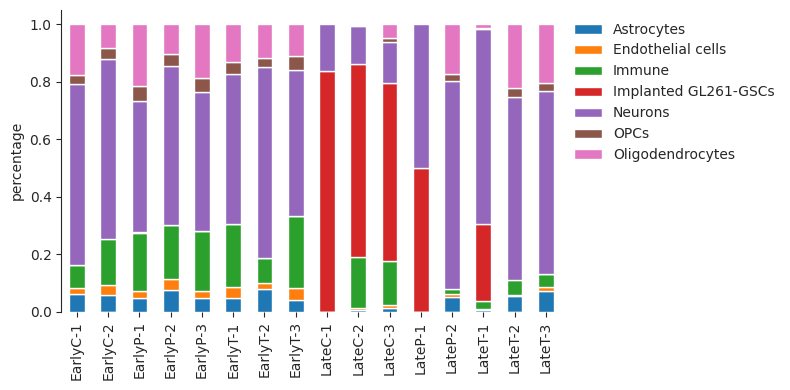

In [60]:
with rc_context({'font.size': 10.0,'figure.figsize': (5, 5),
                'axes.spines.right': False, 'axes.spines.top': False, 'axes.spines.bottom': False,
                 'legend.frameon':False
                }):
    ax = bc.pl.celllabel_quant_stackedbar(
    brain, count_variable="sample_r", subset_variable="annotations"
    )
    
    plt.show()


In [61]:
with rc_context({'font.size': 10.0,
                'axes.spines.right': False, 'axes.spines.top': False, 'axes.spines.bottom': False,
                 'legend.frameon':False, 
                }):
    ax = bc.pl.celllabel_quant_stackedbar(
    brain, count_variable="time", subset_variable="annotations", figsize=(2,5)
    )
    
    plt.show

/home/laura.vicente/miniconda3/envs/ipykernel_py3/lib/python3.11/site-packages/besca/pl/_celltype_quantification.py:189: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.



/home/laura.vicente/miniconda3/envs/ipykernel_py3/lib/python3.11/site-packages/besca/pl/_celltype_quantification.py:189: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.



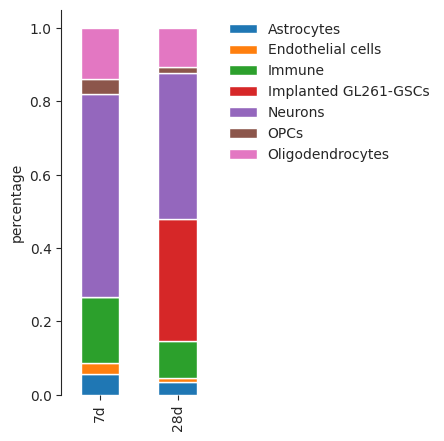

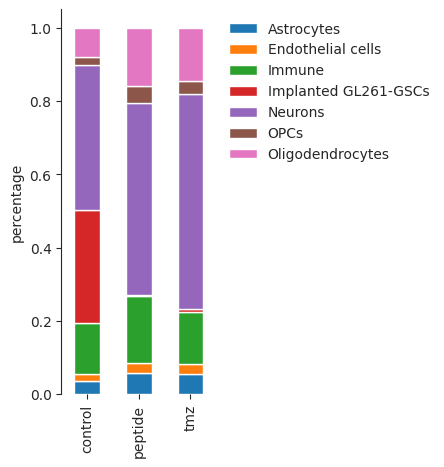

In [62]:
with rc_context({'font.size': 10.0,
                'axes.spines.right': False, 'axes.spines.top': False, 'axes.spines.bottom': False,
                 'legend.frameon':False, 
                }):
    ax = bc.pl.celllabel_quant_stackedbar(
    brain, count_variable="treatment", subset_variable="annotations", figsize=(2,5)
    )
    
    plt.show()

/home/laura.vicente/miniconda3/envs/ipykernel_py3/lib/python3.11/site-packages/besca/pl/_celltype_quantification.py:189: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.



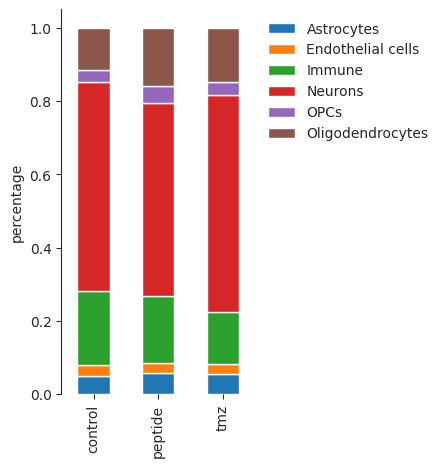

In [63]:
non_malignant = brain[brain.obs['annotations'] != 'Implanted GL261-GSCs'].copy()

with rc_context({'font.size': 10.0,
                'axes.spines.right': False, 'axes.spines.top': False, 'axes.spines.bottom': False,
                 'legend.frameon':False, 
                }):

    ax = bc.pl.celllabel_quant_stackedbar(
    non_malignant, count_variable="treatment", subset_variable="annotations", figsize=(2.5,5)
    )
    
    plt.show()

/home/laura.vicente/miniconda3/envs/ipykernel_py3/lib/python3.11/site-packages/seaborn/categorical.py:166: FutureWarning:

Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:Black'` for same effect.



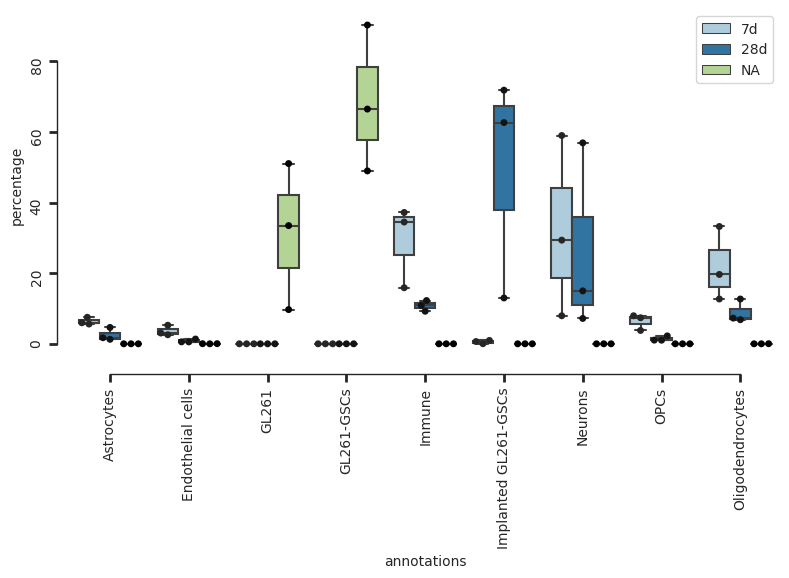

In [45]:
bc.pl.celllabel_quant_boxplot(
    adata,
    count_variable="annotations",
    subset_variable="phase",
    condition_identifier="time",
    plot_percentage=True,
)

In [46]:
annot= ['skyblue','violet','khaki','lightcoral','slateblue','sandybrown', 'yellowgreen']

ax = df.plot(kind='barh', stacked=True, figsize=(5, 1.1), width=0.8, alpha=0.9,
                 color=annot, title='Annotations')

# for c in ax.containers:
#     # customize the label to account for cases when there might not be a bar section
#     labels = [f'{w:.0f}' if (w := v.get_width()) > 0 else '' for v in c ]
#     # set the bar label
#     ax.bar_label(c, labels=labels, label_type='center')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(left = False)
# ax.get_xaxis().set_ticks([0,100])
ax.set_ylabel('')
ax.set_yticklabels(['7d','28d'])
ax.legend(bbox_to_anchor=(1, -0.4),frameon=False, ncol=2)

plt.show()

NameError: name 'df' is not defined